In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/TobyyR/lab-customer-analysis-round-2/master/files_for_lab/csv_files/marketing_customer_analysis.csv")
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df.shape

(10910, 26)

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
df = df.drop(columns =["unnamed:_0"], axis = 0)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [7]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [8]:
df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [9]:
df.select_dtypes(include=['object']).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [10]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [11]:
dfs = df[df["state"].isna()]
dfs

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,31710,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,BR69566,NaN,14019.833140,NaN,Basic,College,2/18/11,Employed,M,31739,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,0,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,25746,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,IJ40048,NaN,4978.950257,NaN,Basic,Bachelor,1/31/11,Employed,M,28695,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,SO38188,NaN,5308.617246,NaN,Extended,Bachelor,1/24/11,Employed,M,40178,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,PD52748,NaN,10036.536340,NaN,Extended,High School or Below,2/12/11,Unemployed,F,0,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,66947,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [12]:
dfm = df[df["months_since_last_claim"].isna()]
dfm

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
23,NQ71171,California,5107.071054,No,Basic,Bachelor,2/2/11,Employed,M,70174,...,NaN,7,Personal Auto,Personal L2,Offer1,Agent,128.900320,Four-Door Car,Medsize,NaN
51,FT56968,Arizona,2590.096027,No,Basic,High School or Below,1/3/11,Employed,M,22398,...,NaN,1,Personal Auto,Personal L1,Offer1,Agent,321.600000,Four-Door Car,Large,A
59,EP83939,Arizona,5575.751228,No,Basic,High School or Below,1/26/11,Employed,M,91416,...,NaN,5,Personal Auto,Personal L3,Offer2,Call Center,109.904496,Four-Door Car,Medsize,NaN
67,KR35099,Washington,7507.455372,Yes,Basic,College,2/6/11,Employed,M,60920,...,NaN,2,Personal Auto,Personal L3,Offer2,Agent,231.201886,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,AP56340,Washington,5384.671725,No,Basic,Bachelor,2/26/11,Disabled,M,13103,...,NaN,7,Personal Auto,Personal L2,Offer1,Agent,458.003651,Four-Door Car,Medsize,A
10816,AW71157,California,5531.723723,No,Basic,College,1/16/11,Employed,M,50097,...,NaN,5,Personal Auto,Personal L1,Offer3,Web,17.484679,Four-Door Car,Medsize,A
10833,OQ99704,Washington,3981.775889,No,Basic,Bachelor,2/11/11,Employed,F,52801,...,NaN,1,Personal Auto,Personal L3,Offer2,Branch,475.200880,SUV,Small,A
10834,FU99476,Washington,6770.306834,No,Extended,High School or Below,2/22/11,Employed,M,74422,...,NaN,3,Personal Auto,Personal L1,Offer1,Call Center,95.338505,Four-Door Car,Medsize,A


In [13]:
dfn = df[df["number_of_open_complaints"].isna()]
dfn

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
23,NQ71171,California,5107.071054,No,Basic,Bachelor,2/2/11,Employed,M,70174,...,NaN,7,Personal Auto,Personal L2,Offer1,Agent,128.900320,Four-Door Car,Medsize,NaN
51,FT56968,Arizona,2590.096027,No,Basic,High School or Below,1/3/11,Employed,M,22398,...,NaN,1,Personal Auto,Personal L1,Offer1,Agent,321.600000,Four-Door Car,Large,A
59,EP83939,Arizona,5575.751228,No,Basic,High School or Below,1/26/11,Employed,M,91416,...,NaN,5,Personal Auto,Personal L3,Offer2,Call Center,109.904496,Four-Door Car,Medsize,NaN
67,KR35099,Washington,7507.455372,Yes,Basic,College,2/6/11,Employed,M,60920,...,NaN,2,Personal Auto,Personal L3,Offer2,Agent,231.201886,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,AP56340,Washington,5384.671725,No,Basic,Bachelor,2/26/11,Disabled,M,13103,...,NaN,7,Personal Auto,Personal L2,Offer1,Agent,458.003651,Four-Door Car,Medsize,A
10816,AW71157,California,5531.723723,No,Basic,College,1/16/11,Employed,M,50097,...,NaN,5,Personal Auto,Personal L1,Offer3,Web,17.484679,Four-Door Car,Medsize,A
10833,OQ99704,Washington,3981.775889,No,Basic,Bachelor,2/11/11,Employed,F,52801,...,NaN,1,Personal Auto,Personal L3,Offer2,Branch,475.200880,SUV,Small,A
10834,FU99476,Washington,6770.306834,No,Extended,High School or Below,2/22/11,Employed,M,74422,...,NaN,3,Personal Auto,Personal L1,Offer1,Call Center,95.338505,Four-Door Car,Medsize,A


In [14]:
dfvc = df[df["vehicle_class"].isna()]
dfvc

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,14616,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,11432,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,89781,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,60546,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,31617,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,25998,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2/5/11,Unemployed,M,0,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,NaN
10879,FK95213,California,18611.453560,No,Extended,Master,1/16/11,Employed,F,49673,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,NaN
10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,1/17/11,Employed,M,23046,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [15]:
dfvs = df[df["vehicle_size"].isna()]
dfvs

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,14616,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,11432,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,89781,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,60546,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,31617,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,25998,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2/5/11,Unemployed,M,0,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,NaN
10879,FK95213,California,18611.453560,No,Extended,Master,1/16/11,Employed,F,49673,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,NaN
10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,1/17/11,Employed,M,23046,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [16]:
dfvt = df[df["vehicle_type"].isna()]
dfvt

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,SO95845,California,5807.659307,No,Basic,College,1/7/11,Employed,F,62447,...,0.0,7,Personal Auto,Personal L3,Offer4,Call Center,133.977857,Two-Door Car,Medsize,NaN
10900,VN73653,Oregon,6423.739052,No,Basic,College,2/13/11,Unemployed,M,0,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,1/13/11,Employed,M,33531,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,NaN
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [17]:
df = df.dropna(subset = ["vehicle_type", "vehicle_size", "vehicle_class", "number_of_open_complaints", "months_since_last_claim", "response", "state"])
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [18]:
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"], errors = "coerce")
df

C:\Users\torei\AppData\Local\Temp\ipykernel_26260\551086416.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["effective_to_date"] = pd.to_datetime(df["effective_to_date"], errors = "coerce")
C:\Users\torei\AppData\Local\Temp\ipykernel_26260\551086416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["effective_to_date"] = pd.to_datetime(df["effective_to_date"], errors = "coerce")


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [19]:
df['month'] = pd.to_datetime(df['effective_to_date']).dt.month

filtered_data = df[(df['effective_to_date'].dt.month >= 1) & (df['effective_to_date'].dt.month <= 3)]

#if filtered_data.empty:
#    filtered_data = df[(df['effective_to_date'].dt.month >= 1) & (df['effective_to_date'].dt.month <= 2)]

filtered_data


C:\Users\torei\AppData\Local\Temp\ipykernel_26260\3928520496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['effective_to_date']).dt.month


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [20]:
df.month.value_counts(ascending=True)

month
2    2134
1    2409
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4543 non-null   object        
 1   state                          4543 non-null   object        
 2   customer_lifetime_value        4543 non-null   float64       
 3   response                       4543 non-null   object        
 4   coverage                       4543 non-null   object        
 5   education                      4543 non-null   object        
 6   effective_to_date              4543 non-null   datetime64[ns]
 7   employmentstatus               4543 non-null   object        
 8   gender                         4543 non-null   object        
 9   income                         4543 non-null   int64         
 10  location_code                  4543 non-null   object        
 11  marital_status       

In [22]:
df.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,4543.000000,4543,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,2011-01-29 19:29:56.434074368,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525,1.469734
min,1904.000852,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4039.089902,2011-01-16 00:00:00,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145,1.000000
50%,5846.520588,2011-01-30 00:00:00,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000,1.000000
75%,8936.596938,2011-02-13 00:00:00,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000,2.000000
max,83325.381190,2011-02-28 00:00:00,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000
std,6959.529443,NaN,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990,0.499138


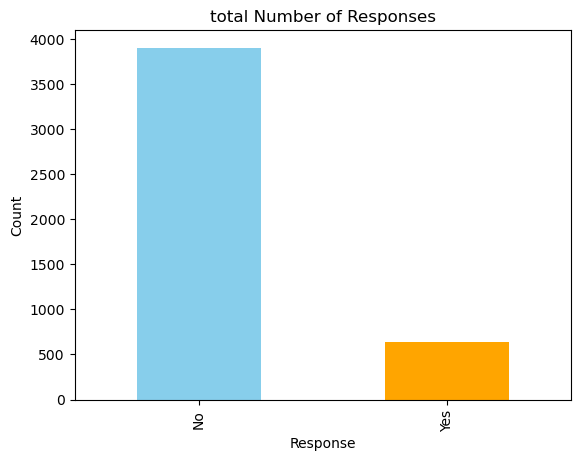

In [23]:
response_counts = df['response'].value_counts()
response_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

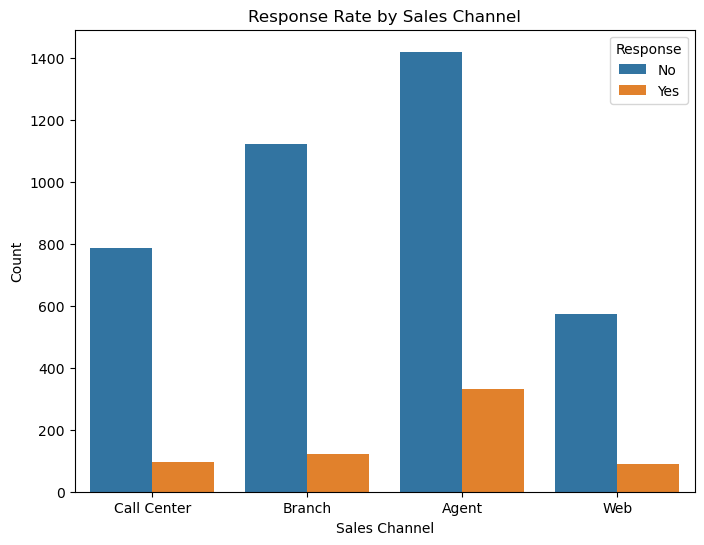

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'sales_channel', hue = 'response', data = df)
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

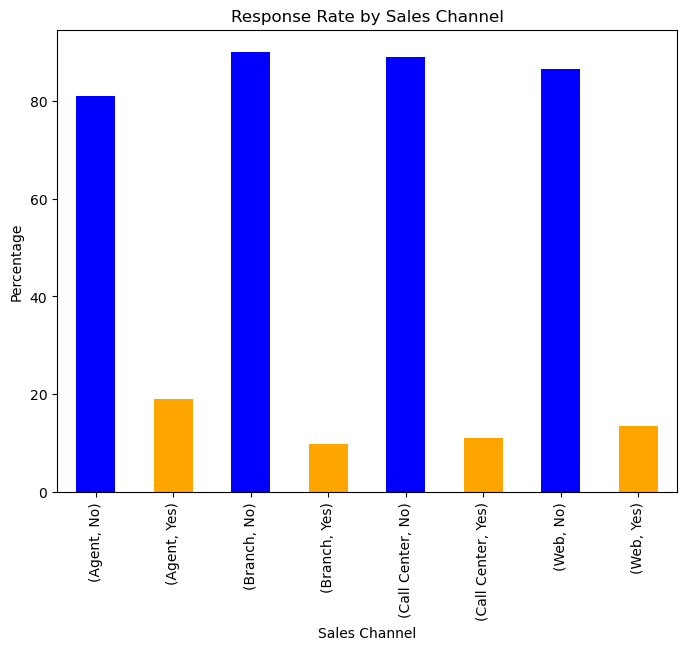

In [25]:
plt.figure(figsize=(8, 6))
response_by_channel = df.groupby('sales_channel')['response'].value_counts(normalize=True) * 100
response_by_channel.plot(kind='bar', color=['blue', 'orange'])
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.show()

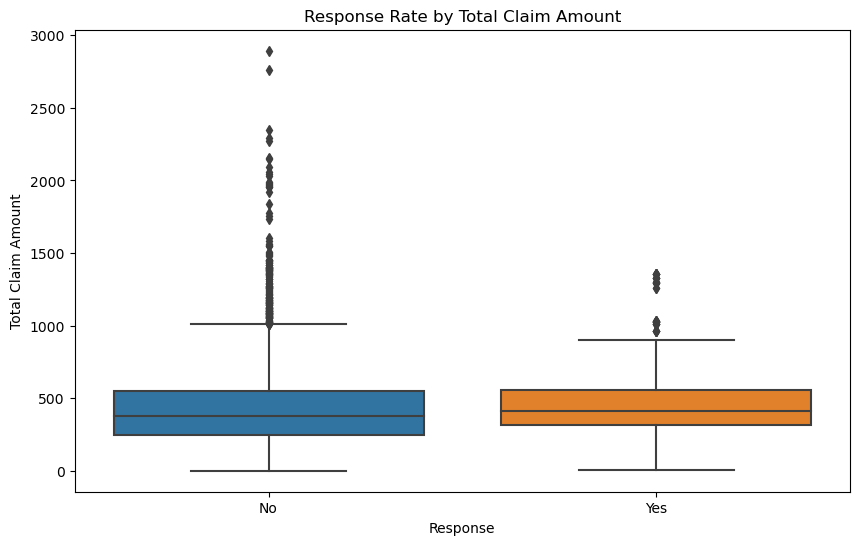

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='total_claim_amount', data=df)
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Response')
plt.ylabel('Total Claim Amount')
plt.show()

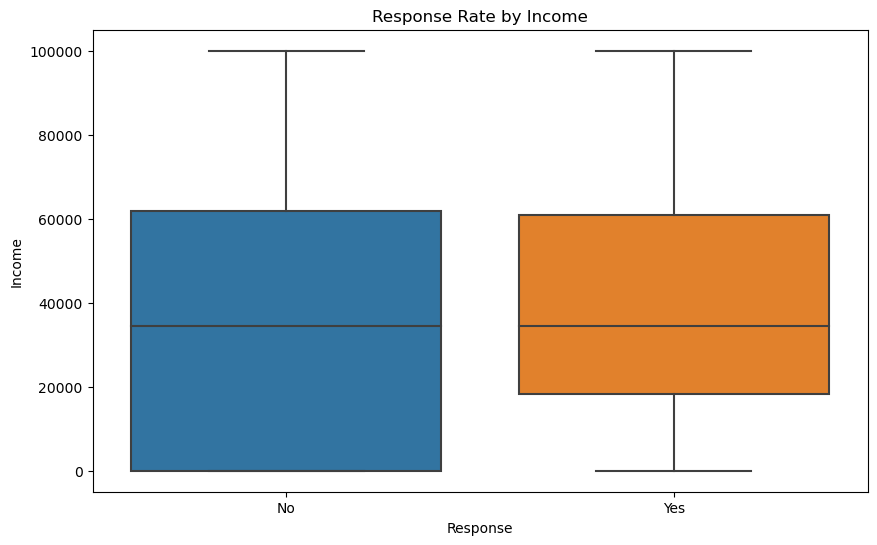

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='income', data=df)
plt.title('Response Rate by Income')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

In [28]:
## Lab customer analysis round 4

In [29]:
# Check data types of columns
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
categoricals = df.select_dtypes(include=[object]).columns.tolist()

print("\nNumerical Columns:", numerical)
print("\nCategorical Columns:", categoricals)


Numerical Columns: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'month']

Categorical Columns: ['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


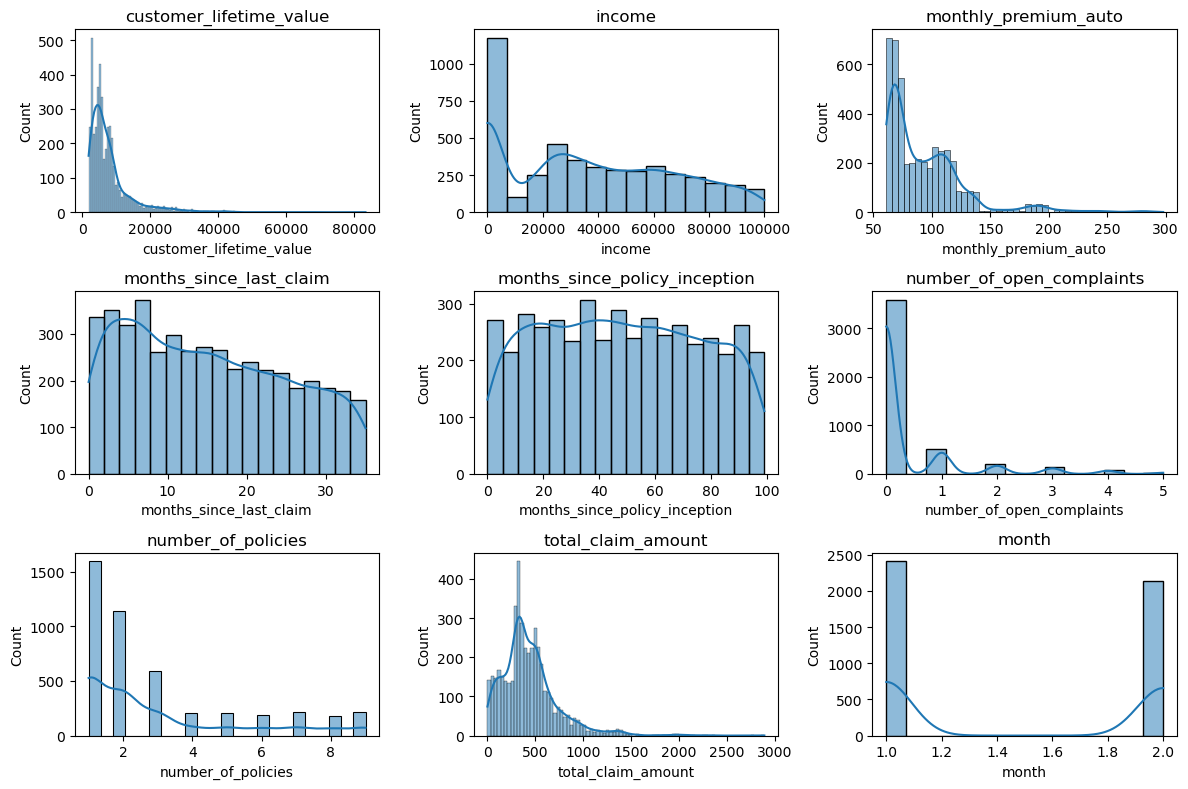

In [30]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

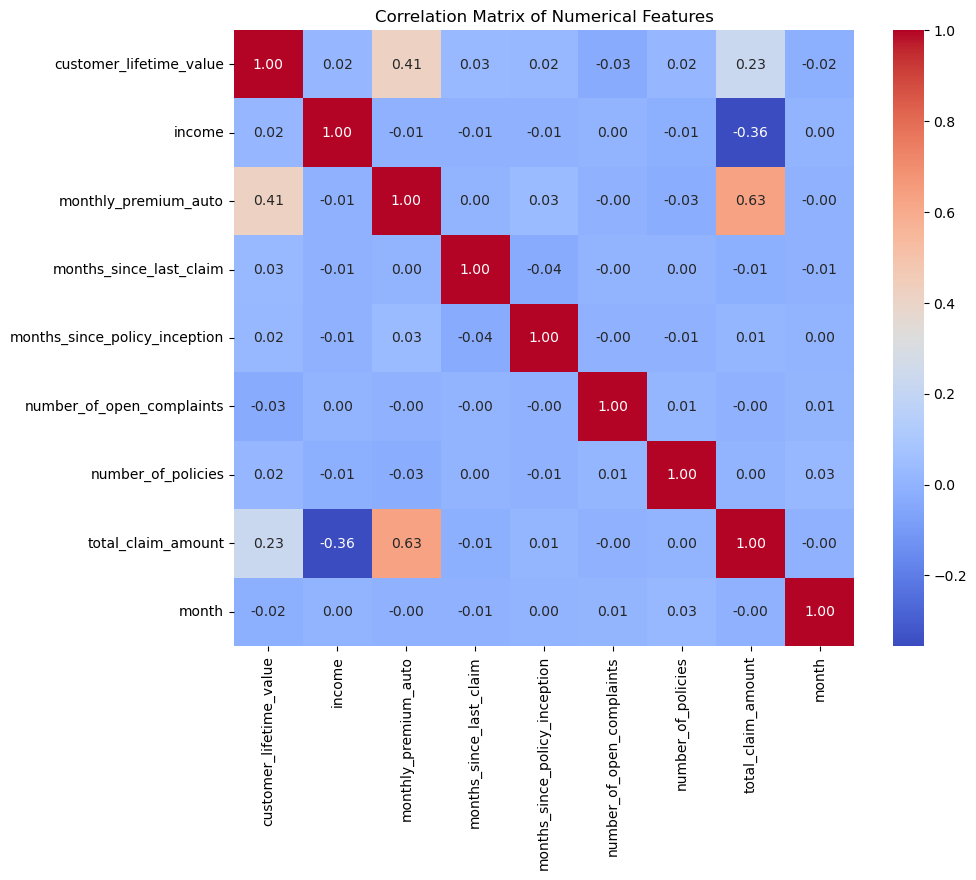

In [31]:
numerical = df.select_dtypes(include=[np.number])
categoricals = df.select_dtypes(include=[object])

correlation_matrix = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [32]:
high_corr_pairs = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[0]) if abs(correlation_matrix.iloc[i, j]) > 0.9]
high_corr_pairs

[]

In [33]:
if high_corr_pairs:
    # Drop one of the features from each highly correlated pair
    for pair in high_corr_pairs:
        feature1 = numerical.columns[pair[0]]
        feature2 = numerical.columns[pair[1]]
        print(f"Features '{feature1}' and '{feature2}' have high correlation of {correlation_matrix.iloc[pair]}")

        # Drop the feature with the least importance
        # Here, you can implement your logic to decide which feature to drop
        # For demonstration, let's drop the feature with the lower mean correlation with other variables
        mean_corr_feature1 = correlation_matrix[feature1].drop(feature1).abs().mean()
        mean_corr_feature2 = correlation_matrix[feature2].drop(feature2).abs().mean()

        if mean_corr_feature1 < mean_corr_feature2:
            numerical.drop(columns=[feature1], inplace=True)
            print(f"Dropping '{feature1}'")
        else:
            numerical.drop(columns=[feature2], inplace=True)
            print(f"Dropping '{feature2}'")

    print("\nUpdated Numerical DataFrame after dropping highly correlated features:")
    print(numerical.head())
else:
    print("No pair of features have high correlation (> 0.9), so no features are dropped.")

No pair of features have high correlation (> 0.9), so no features are dropped.


In [34]:
## Lab customer analysis round 5 + 6 + 7 
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [35]:
# X-y split
X = df.drop(columns=['total_claim_amount'])  # Features
y = df['total_claim_amount']  # Target

# Normalize numerical features
scaler = StandardScaler()
X_numerical_normalized = scaler.fit_transform(X.select_dtypes(include=np.number))

# One Hot Encoding for categorical features
X_categorical_encoded = pd.get_dummies(X.select_dtypes(include=object), drop_first=True)

# Concatenate numerical and encoded categorical features
X_processed = np.concatenate([X_numerical_normalized, X_categorical_encoded], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Apply linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Model Validation for Linear Regression
# Train R2
r2_train_lr = r2_score(y_train, y_pred_train_lr)
# Test R2
r2_test_lr = r2_score(y_test, y_pred_test_lr)
# Train MSE
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
# Test MSE
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
# Train RMSE
rmse_train_lr = np.sqrt(mse_train_lr)
# Test RMSE
rmse_test_lr = np.sqrt(mse_test_lr)
# Train MAE
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
# Test MAE
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

print("Linear Regression Model Validation Results:")
print("Train R2:", r2_train_lr)
print("Test R2:", r2_test_lr)
print("Train MSE:", mse_train_lr)
print("Test MSE:", mse_test_lr)
print("Train RMSE:", rmse_train_lr)
print("Test RMSE:", rmse_test_lr)
print("Train MAE:", mae_train_lr)
print("Test MAE:", mae_test_lr)

from sklearn.preprocessing import MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

# Feature Scaling
scaler_minmax = MinMaxScaler()
X_numerical_minmax = scaler_minmax.fit_transform(X.select_dtypes(include=np.number))

scaler_robust = RobustScaler()
X_numerical_robust = scaler_robust.fit_transform(X.select_dtypes(include=np.number))


# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_numerical_minmax)  # Using MinMax scaled numerical features


# Feature Selection using RFE
lr_model_rfe = LinearRegression()
rfe = RFE(lr_model_rfe, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_processed, y)

# Train-test split for each modified dataset
X_train_minmax, X_test_minmax, _, _ = train_test_split(X_numerical_minmax, y, test_size=0.2, random_state=42)
X_train_robust, X_test_robust, _, _ = train_test_split(X_numerical_robust, y, test_size=0.2, random_state=42)
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)
X_train_rfe, X_test_rfe, _, _ = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train models and evaluate them
lr_models = {
    "Original": lr_model,
    "MinMax Scaling": LinearRegression().fit(X_train_minmax, y_train),
    "Robust Scaling": LinearRegression().fit(X_train_robust, y_train),
    "Polynomial Features": LinearRegression().fit(X_train_poly, y_train),
    "Feature Selection (RFE)": LinearRegression().fit(X_train_rfe, y_train)
}

# Evaluate models
evaluation_results = {}
for name, model in lr_models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    evaluation_results[name] = {"Train R^2": train_score, "Test R^2": test_score}

evaluation_results

Linear Regression Model Validation Results:
Train R2: 1.0
Test R2: 0.7339261563840986
Train MSE: 4.60093679475506e-24
Test MSE: 21246.274402297167
Train RMSE: 2.144979439238302e-12
Test RMSE: 145.76101811628914
Train MAE: 1.2572840898707174e-12
Test MAE: 97.95551908023268
